In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv -O bbc-text.csv

--2020-07-08 19:30:41--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.216.128, 172.217.204.128, 172.217.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.216.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.05s   

2020-07-08 19:30:41 (106 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [3]:
import csv
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
sentences = []
labels = []
stopwords =  [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [5]:
import os
os.listdir()

['.config', 'bbc-text.csv', 'sample_data']

In [6]:
mycsv = 'bbc-text.csv'

In [7]:
import csv

In [8]:
with open(mycsv,'r') as f:
  reader = csv.reader(f,delimiter=',')
  next(reader)
  for row in reader:
    labels.append(row[0])
    sentence = row[0]
    for word in stopwords:
      token = ' ' + word + ' '
      sentence = sentence.replace(token," ")
      sentence = sentence.replace('  ',' ')
    sentences.append(sentence)  

In [9]:
print(len(sentences))

2225


In [10]:
print(len(labels))

2225


In [11]:
import tensorflow as tf


In [12]:
tokenizer = Tokenizer(num_words=1000,oov_token='<OOV>')

In [13]:
training_partition=0.8

In [14]:
train_size = int((len(sentences))*training_partition)

In [15]:
train_sentences = sentences[:train_size]
test_senteces = sentences[train_size:]
train_labels = labels[:train_size]
test_labels = labels[train_size:]

In [16]:
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

In [17]:
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences,maxlen=120,padding='post',truncating='post')

In [18]:
test_sequences = tokenizer.texts_to_sequences(test_senteces)
test_padded = pad_sequences(test_sequences,maxlen=120,padding='post',truncating='post')

In [19]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

In [20]:
label_word_index = label_tokenizer.word_index

In [21]:
label_word_index

{'business': 2, 'entertainment': 5, 'politics': 3, 'sport': 1, 'tech': 4}

In [22]:
import numpy as np

In [23]:
train_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
test_label_seq = np.array(label_tokenizer.texts_to_sequences(test_labels))

In [24]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=1000,output_dim=32,input_length=120),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(24,activation='relu'),
                                    tf.keras.layers.Dense(12,activation='relu'),
                                    tf.keras.layers.Dense(6,activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 32)           32000     
_________________________________________________________________
global_average_pooling1d (Gl (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                792       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
Total params: 33,170
Trainable params: 33,170
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
tf.keras.backend.clear_session()

In [28]:
history = model.fit(train_padded,train_label_seq,epochs=50,verbose=2,validation_data=(test_padded,test_label_seq))

Epoch 1/50
56/56 - 0s - loss: 1.7508 - accuracy: 0.2213 - val_loss: 1.6976 - val_accuracy: 0.2270
Epoch 2/50
56/56 - 0s - loss: 1.6603 - accuracy: 0.2303 - val_loss: 1.6224 - val_accuracy: 0.2270
Epoch 3/50
56/56 - 0s - loss: 1.6173 - accuracy: 0.2303 - val_loss: 1.6041 - val_accuracy: 0.2270
Epoch 4/50
56/56 - 0s - loss: 1.6086 - accuracy: 0.2174 - val_loss: 1.6039 - val_accuracy: 0.2270
Epoch 5/50
56/56 - 0s - loss: 1.6021 - accuracy: 0.2438 - val_loss: 1.5961 - val_accuracy: 0.2270
Epoch 6/50
56/56 - 0s - loss: 1.6001 - accuracy: 0.2343 - val_loss: 1.6013 - val_accuracy: 0.2382
Epoch 7/50
56/56 - 0s - loss: 1.5995 - accuracy: 0.2404 - val_loss: 1.5928 - val_accuracy: 0.4652
Epoch 8/50
56/56 - 0s - loss: 1.5963 - accuracy: 0.2388 - val_loss: 1.5894 - val_accuracy: 0.2382
Epoch 9/50
56/56 - 0s - loss: 1.5916 - accuracy: 0.2433 - val_loss: 1.5865 - val_accuracy: 0.2382
Epoch 10/50
56/56 - 0s - loss: 1.5870 - accuracy: 0.2410 - val_loss: 1.5831 - val_accuracy: 0.4652
Epoch 11/50
56/56 -

In [29]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(len(loss))

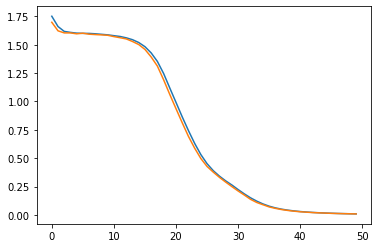

In [30]:
import matplotlib.pyplot as plt
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)

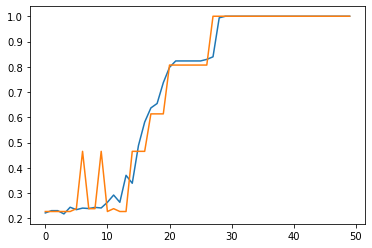

In [31]:
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)

In [32]:
my_sentences = ['giving financial gifts to children your child or grandchild may want the latest toy this christmas  but how about giving them a present that will help their financial future   gifts of the financial variety might have a longer lasting impact. it may encourage children to save or start a fund which could count towards university costs  for example.  the government is trying to encourage saving at an early age  through its new child trust fund. the first vouchers  worth £250 or £500 for low-income families  will be distributed from january. all children born after 1st september 2002 will be eligible. parents will need to decide which financial institution will manage this gift in time for the start of the scheme in april 2005.  parents and relatives will be able to top up the fund with up to £1 200 a year  which will grow free of income and capital gains tax. as the child trust fund will not be in force in time for christmas  relatives could invest their gifts in a higher rate children s deposit account  and use this as a feeder fund.  there are accounts designed to start children off in the savings habit and they often pay a higher rate of interest. some of the best instant-access accounts currently available include the ladybird account from the saffron walden building society  paying 5.35% for a minimum balance of £1 and the alliance & leicester firstsaver which pays 5.25%  also starting at £1.  interest earned by children is subject to income tax. however  children  like adults  have a personal income tax allowance (£4 745 for the current tax year).  if the account holds money gifted by friends and relatives - but not parents - any interest earned from the savings account may be set against the allowance. as long as the total amount of interest falls within the allowance  then no tax will be payable. when the account is opened a form  r85   available from the bank or building society  should be completed. this confirms that the account holder is a non-taxpayer and allows interest to be received without the deduction of income tax.  the tax rules are different for parents who save on behalf of a child. only £100 of interest (per parent) can be tax-free. where interest exceeds this level  the whole of the interest will be taxed on the parent. this is to prevent parents from holding their own cash savings in their children s names and taking advantage of the tax allowances. where both parents and other relatives are saving on behalf of a child  consideration should be given to opening separate accounts - one for parents  gifts and one for gifts from other relatives. therefore  it may be preferable for parents to contribute to the child trust fund which is tax free  with any gifts from relatives that take the total above the annual £1 200 limit being directed to a deposit account.  another favourite solution is premium bonds. with the promise of riches far greater than a mere deposit account  they make great presents. the parent or guardian will be responsible for the bonds and will receive notification of the purchase. any prizes will be sent to the parent or child s guardian. the minimum for each purchase is £100 and bonds are sold in multiples of £10.  there are gift opportunities beyond cash accounts and these should not be ignored.  over the longer term  stock market funds have outperformed other types of investment  although in the shorter term they can be volatile. one of the benefits of investing for children is that investment is generally for the longer term - more than ten years - which helps to reduce the risks associated with investing in shares. one way to spread the risk is to invest in the stock market through a unit or investment trust. these are pooled investment funds which give access to a wide range of shares. these funds may be actively managed  where a fund manager picks individual stocks based on a view of their future potential  or passive  where a manager invests in all the shares that comprise a stock market index  for example  the ftse 100. exchange traded funds offer an alternative way to track a stock market. these are single shares that give the return of an underlying index (so are really another form of tracker). the difference is that the charges are quite low. the only drawback with all financial gifts is that the children gain an absolute right to the money at age 18  and parents will have no control over how it is spent. for larger gifts it may be worthwhile taking professional advice on the establishment of a suitable trust that will allow ongoing control over the capital and income.','few ready  for information act thousands of public bodies are ill-prepared for the freedom of information act  due to come into force next month  because of government failures  say mps.  from next month anyone will have the power to demand information from a range of public bodies - from whitehall departments to doctors  surgeries. but an all-party committee said it was  not confident  many would be ready. it blamed the department for constitutional affairs for a  lack of consistent leadership .  the act comes into effect in england  wales and northern ireland  on 1 january while similar measures are being brought in at the same time in scotland. it provides the public with a right of access to information held by about 100 000 public bodies  subject to various exemptions.  but the government department responsible for implementing the change suffered from an  unusually high turnover  of staff within the department  which had  seriously interfered  with its work  said the constitutional affairs select committee. it said  despite four years of preparations  some local authorities and parts of the health sector were still not ready. the dca had  failed  to provide early guidance on technical matters and shown a  lack of consistent leadership   the mps found. committee chairman alan beith said:  the dca has had four years to prepare for freedom of information  but with less than a month to go it appears that some bodies may not be well enough prepared.  our report shows that in the past support and guidance from the dca  which has overall responsibility for guiding the public sector through the process of implementation for the freedom of information regime  has been lacking.  a spokesman for the dca said:  the dca has provided - and will continue to provide - strong  clear leadership.  it has delivered a simple  liberal fees regime  guidance on the act which has been widely praised  and expert networks of staff working on freedom of information implementation.','soros group warns of kazakh close the open society institute (osi)  financed by billionaire george soros  has accused kazakhstan officials of trying to close down its local office.  a demand for unpaid taxes and fines of $600 000 (£425 000) is politically motivated  the osi claimed  adding that it paid the money in october. the organisation has found itself in trouble after being accused of helping to topple georgia s former president. it denies having any role  but offices have had to close across the region.  the osi shut its office in moscow last year and has withdrawn from uzbekistan and belarus. in the ukraine earlier this year  mr soros - who took on the bank of england in the 1990s - and won  was pelted by protestors.  this legal prosecution can be considered an attempt by the government to force soros foundation-kazakhstan to cease its activities in kazakhstan and shut its doors for kazakh citizens and organisations   the osi said.  the osi aims to promote democratic and open  market-based societies. since the break up of the soviet union in 1991  kazakhstan has been dominated by its president nursultan abish-uly nazarbayev. he has powers for life  while insulting the president and officials has been made a criminal offence. the government controls the printing presses and most radio and tv transmission facilities. it operates the country s national radio and tv networks. recent elections were criticised as flawed and the opposition claimed there was widespread vote rigging. supporters  however  say he brings much needed stability to a region where islamic militancy is on the rise. they also credit him with promoting inter-ethnic accord and pushing through harsh reforms.']

In [33]:
my_sequences = tokenizer.texts_to_sequences(my_sentences)

In [34]:
my_padded = pad_sequences(my_sequences,maxlen=120,padding='post',truncating='post')

In [35]:
print(model.predict(my_padded))

[[0.02124476 0.08665599 0.14178646 0.17188844 0.01528149 0.56314284]
 [0.02124476 0.08665599 0.14178646 0.17188844 0.01528149 0.56314284]
 [0.02124476 0.08665599 0.14178646 0.17188844 0.01528149 0.56314284]]
